In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

CIFAR-10 je veľký dataset (60 000 obrázkov rozdelených do 10 kategórií). Obrázky sú full RGB s rozmermi 32x32.

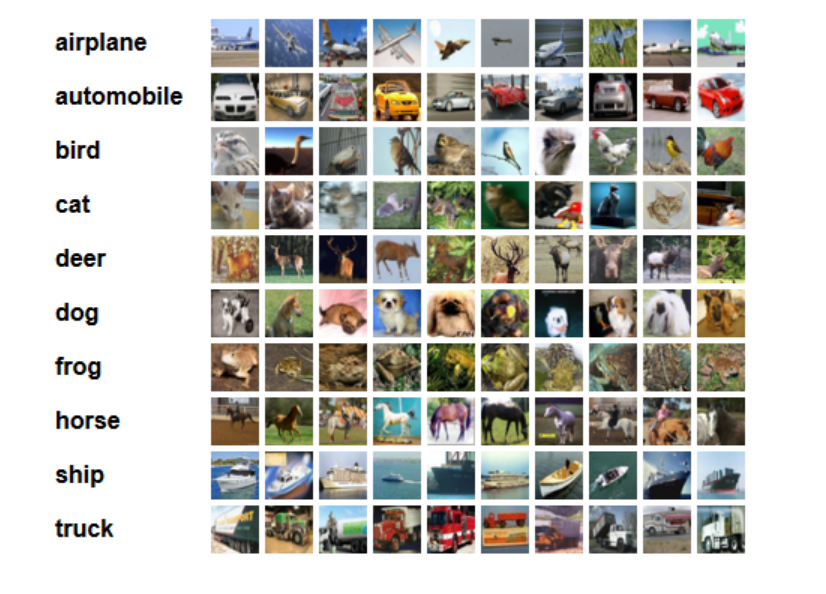

In [ ]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


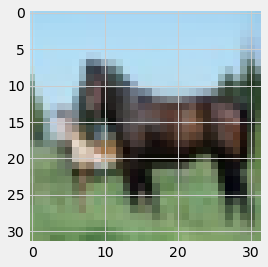

In [ ]:
#10ti obrázok z datasetu
index = 12
img = plt.imshow(x_train[index])

In [ ]:
#image label
print('The image label is:', y_train[index])

The image label is: [7]


In [ ]:
classification = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('The image class is: ', classification[y_train[index][0]])

The image class is:  horse


Neurónovej sieti nemôžeme predhodiť množinu obrázkov ako takých, sieť s obrázkami pracovať nevie, hodnoty musíme zakódovať pomocou metódy One-hot. V strojovom učení je one-hot kódovanie často použité pri práci s kategorickými údajmi. Pretože mnohé modely strojového učenia potrebujú aby ich vstupné premenné boli číselné, kategorické premenné je potrebné transformovať. 

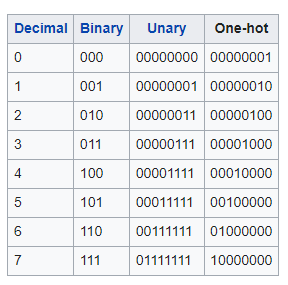
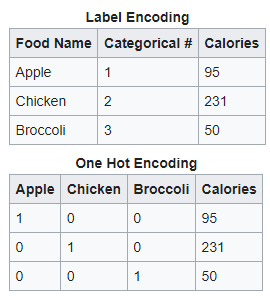

In [ ]:
#convert labels into set of 10 numbers to input into CNN
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
print('The one hot label is:', y_train_one_hot[index])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
#normalize pixels to be values between 0..1
x_train = x_train / 255
x_test = x_test / 255

# Návrh modelu 

### Konvolučná vrstva
Pri ich implementácii v Kerase musíme špecifikovať požadovaný počet kanálov/filtrov, veľkosť požadovaného filtra (v tomto prípade 3 x 3), vstupný tvar (pri vytváraní prvej vrstvy ) a aktiváčnú funkciu. Toto všetko sú tzv. hyperparametre, ktoré sú vhodné k nastavovaniu siete.

### Združovacia vrstva
Pri implementácií združovacej vrstvy musíme uviesť veľkosť filtra (v našom prípade 2x2).

### Vrstva Dropout
Táto vrstva náhodne eliminuje niektoré spojenia medzi vrstvami. Vyhneme sa takto overfittingu.



1.   konvolučná vrstva
2.   združovacia vrstva
3.   dropout

### Flatten
Posledné vrstvy siete potrebujú ako vstup dáta vo forme vektoru. Touto funkciou dáta skomprimujeme do dlhého vektora.

### Husto prepojené vrstvy
Takáto vrstva sa implementuje funkciou Dense(), musíme tu špecifikovať počet neurónov vo vrstve. Počet neurónov by mal s pribúdajúcimi vrstvami klesať, ideálne by sa v poslednej vrstve mal rovnať počtu tried v súbore obrázkov (v našom prípade 10).

Tieto vrstvy extrahujú informácie z máp vlastností/čŕt a učia sa podľa nich klasifikovať daný obrázok. V našom prípade sa jedná o malé obrázky takže bude postačovať napríklad vrstva s 32 neurónami, tieto vrstvy však môžu mať tisícky neurónov.









In [ ]:
#create model achitecture
model = Sequential()

#first convolution layer
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))

#add pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#dropout layer
model.add(Dropout(0.2))

#second convolution layer
model.add(Conv2D(64, (3,3), activation='relu'))

#add second pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#dropout layer
model.add(Dropout(0.2))

#flattening layer
model.add(Flatten())

#dropout layer
model.add(Dropout(0.2))

#add a layer with 250 neurons
model.add(Dense(250, activation='relu'))

#dropout layer
model.add(Dropout(0.2))

#add a layer with 10 neurons
model.add(Dense(10, activation='softmax'))

In [ ]:
#compile
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

# Trénovanie modelu

In [ ]:
#train the model 
history = model.fit(x_train, y_train_one_hot,
                    batch_size = 64,
                    epochs = 10,
                    validation_split = 0.2)

Epoch 1/10
625/625 [==============================] - 47s 74ms/step - loss: 1.6270 - accuracy: 0.4080 - val_loss: 1.3914 - val_accuracy: 0.5005
Epoch 2/10
625/625 [==============================] - 39s 62ms/step - loss: 1.2860 - accuracy: 0.5400 - val_loss: 1.1335 - val_accuracy: 0.6083
Epoch 3/10
625/625 [==============================] - 38s 61ms/step - loss: 1.1430 - accuracy: 0.5942 - val_loss: 1.0962 - val_accuracy: 0.6123
Epoch 4/10
625/625 [==============================] - 37s 60ms/step - loss: 1.0543 - accuracy: 0.6266 - val_loss: 0.9868 - val_accuracy: 0.6618
Epoch 5/10
625/625 [==============================] - 38s 61ms/step - loss: 0.9850 - accuracy: 0.6540 - val_loss: 0.9298 - val_accuracy: 0.6779
Epoch 6/10
625/625 [==============================] - 37s 60ms/step - loss: 0.9271 - accuracy: 0.6765 - val_loss: 0.9120 - val_accuracy: 0.6833
Epoch 7/10
625/625 [==============================] - 38s 61ms/step - loss: 0.8822 - accuracy: 0.6910 - val_loss: 0.8861 - val_accuracy:

# Hodnotenie modelu

In [ ]:
#evaluate the model using the test data set
eval  = model.evaluate(x_test, y_test_one_hot)[1]
print("Accuracy: %.2f%%" % (eval*100))

313/313 [==============================] - 3s 9ms/step - loss: 0.8104 - accuracy: 0.7194
Accuracy: 71.94%


<function matplotlib.pyplot.show(*args, **kw)>

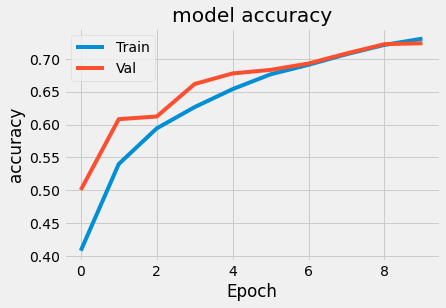

In [ ]:
#visualize accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

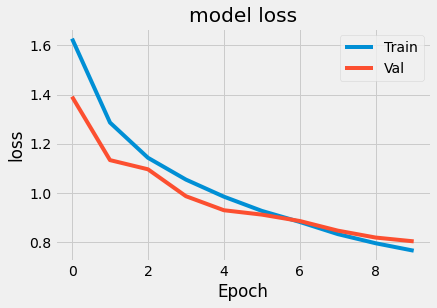

In [ ]:
#visualize loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show

In [ ]:
#test the model with an example
from google.colab import files
uploaded = files.upload()

Saving kitty-cat-kitten-pet-45201.jpeg to kitty-cat-kitten-pet-45201 (1).jpeg


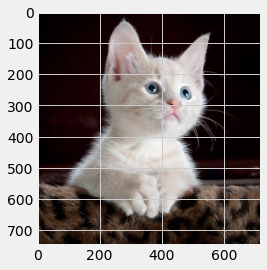

In [ ]:
new_image = plt.imread('kitty-cat-kitten-pet-45201 (1).jpeg')
img = plt.imshow(new_image)
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))

In [ ]:
#models predictions
predictions = model.predict(np.array([resized_image]))

predictions

1/1 [==============================] - 0s 14ms/step


array([[2.6712809e-03, 5.3631058e-05, 1.6818356e-02, 7.3971564e-01,
        3.8637183e-05, 2.3018374e-01, 9.3404716e-03, 1.0939484e-03,
        3.7947080e-05, 4.6344416e-05]], dtype=float32)

In [ ]:
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

#show sorted labels in order
print(list_index)


[3, 5, 2, 6, 0, 7, 1, 9, 4, 8]


In [ ]:
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

cat : 73.97 %
dog : 23.02 %
bird : 1.68 %
frog : 0.93 %
airplane : 0.27 %
